In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Daily weather dataset   
#### Source:  
https://github.com/words-sdsc/coursera/tree/master/big-data-4   
https://courses.edx.org/courses/course-v1:UCSanDiegoX+DSE200x+2T2017/course/    

#### Data Set Information:  
The file **daily_weather.csv** is a comma-separated file that contains weather data. This data comes from a weather station located in San Diego, California. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.  

#### Attribute Information:   
Each row in daily_weather.csv captures weather data for a separate day.  

Sensor measurements from the weather station were captured at one-minute intervals. These measurements were then processed to generate values to describe daily weather. Since this dataset was created to classify low-humidity days vs. non-low-humidity days (that is, days with normal or high humidity), the variables included are weather measurements in the morning, with one measurement, namely relatively humidity, in the afternoon. The idea is to use the morning weather values to predict whether the day will be low-humidity or not based on the afternoon measurement of relative humidity.  

Each row, or sample, consists of the following variables:  

    number: unique number for each row
    air_pressure_9am: air pressure averaged over a period from 8:55am to 9:04am (Unit: hectopascals)   
    air_temp_9am: air temperature averaged over a period from 8:55am to 9:04am (Unit: degrees Fahrenheit)  
    air_wind_direction_9am: wind direction averaged over a period from 8:55am to 9:04am (Unit: degrees, with 0 means coming from the North, and increasing clockwise)  
    air_wind_speed_9am: wind speed averaged over a period from 8:55am to 9:04am (Unit: miles per hour)   
    * max_wind_direction_9am:** wind gust direction averaged over a period from 8:55am to 9:10am (Unit: degrees, with 0 being North and increasing clockwise*)  
    max_wind_speed_9am: wind gust speed averaged over a period from 8:55am to 9:04am (Unit: miles per hour)  
    rain_accumulation_9am: amount of rain accumulated in the 24 hours prior to 9am (Unit: millimeters)  
    rain_duration_9am: amount of time rain was recorded in the 24 hours prior to 9am (Unit: seconds)  
    relative_humidity_9am: relative humidity averaged over a period from 8:55am to 9:04am (Unit: percent)  
    relative_humidity_3pm: relative humidity averaged over a period from 2:55pm to 3:04pm (*Unit: percent *)  

In [2]:
dataset_name = 'daily_weather'

In [2]:
file_path = '~/data/weather/'
file_name = 'daily_weather.csv'
file = file_path + file_name
df = pd.read_csv(file)
df.shape

(1095, 11)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
number                    1095 non-null int64
air_pressure_9am          1092 non-null float64
air_temp_9am              1090 non-null float64
avg_wind_direction_9am    1091 non-null float64
avg_wind_speed_9am        1092 non-null float64
max_wind_direction_9am    1092 non-null float64
max_wind_speed_9am        1091 non-null float64
rain_accumulation_9am     1089 non-null float64
rain_duration_9am         1092 non-null float64
relative_humidity_9am     1095 non-null float64
relative_humidity_3pm     1095 non-null float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [23]:
df.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [24]:
df.describe()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
count,1095.000000,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000
mean,547.000000,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,35.344727
std,316.243577,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067,22.524079
min,0.000000,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,5.300000
25%,273.500000,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,17.395000
50%,547.000000,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,24.380000
75%,820.500000,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,52.060000
max,1094.000000,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,92.250000


In [25]:
# check dataframe for bad data
df.isnull().any() | df.isna().any()

number                    False
air_pressure_9am           True
air_temp_9am               True
avg_wind_direction_9am     True
avg_wind_speed_9am         True
max_wind_direction_9am     True
max_wind_speed_9am         True
rain_accumulation_9am      True
rain_duration_9am          True
relative_humidity_9am     False
relative_humidity_3pm     False
dtype: bool

In [26]:
(df.isnull() | df.isna()).sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [27]:
df[df['air_temp_9am'].isnull()]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,51.190000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,46.500000
840,840,918.043767,NaN,181.774042,0.964376,185.618601,1.570007,0.0,0.0,11.911222,18.154358
861,861,919.065408,NaN,172.303728,2.639600,193.058141,3.326949,0.0,0.0,12.497839,13.438518
1031,1031,922.669195,NaN,47.946284,7.969686,65.770066,10.262337,0.0,0.0,18.920805,19.641841


In [32]:
# drop bad values
df = df.dropna()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1094
Data columns (total 11 columns):
number                    1064 non-null int64
air_pressure_9am          1064 non-null float64
air_temp_9am              1064 non-null float64
avg_wind_direction_9am    1064 non-null float64
avg_wind_speed_9am        1064 non-null float64
max_wind_direction_9am    1064 non-null float64
max_wind_speed_9am        1064 non-null float64
rain_accumulation_9am     1064 non-null float64
rain_duration_9am         1064 non-null float64
relative_humidity_9am     1064 non-null float64
relative_humidity_3pm     1064 non-null float64
dtypes: float64(10), int64(1)
memory usage: 99.8 KB


In [34]:
# drop number - not needed
df = df.drop('number', axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1094
Data columns (total 10 columns):
air_pressure_9am          1064 non-null float64
air_temp_9am              1064 non-null float64
avg_wind_direction_9am    1064 non-null float64
avg_wind_speed_9am        1064 non-null float64
max_wind_direction_9am    1064 non-null float64
max_wind_speed_9am        1064 non-null float64
rain_accumulation_9am     1064 non-null float64
rain_duration_9am         1064 non-null float64
relative_humidity_9am     1064 non-null float64
relative_humidity_3pm     1064 non-null float64
dtypes: float64(10)
memory usage: 91.4 KB


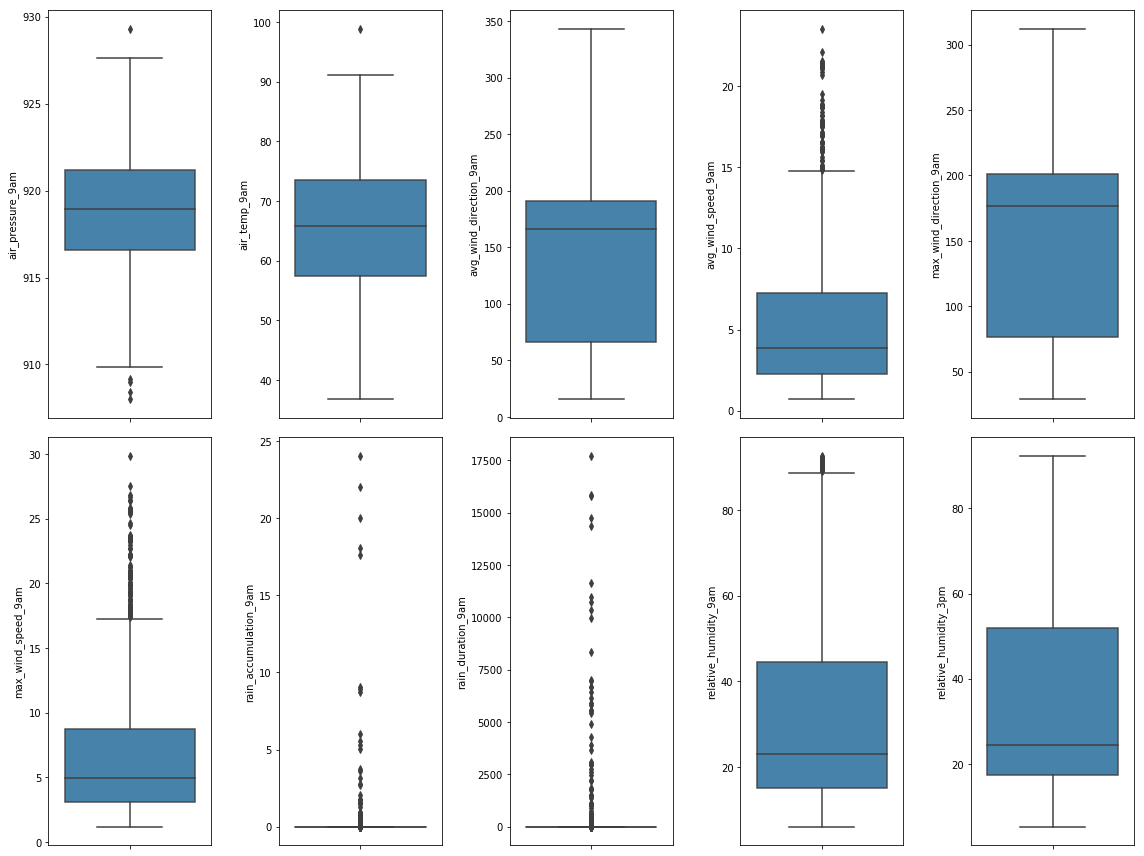

In [15]:
features = list(df.columns.values)

num_plots = len(features)
num_columns = 5
num_rows = math.ceil(num_plots/num_columns) # round up

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(16,12))

if num_rows == 1:
    for index, name in enumerate(features):
        sns.boxplot(y=name, data=df, ax=axs[index], boxprops=dict(alpha=.9))
else:
    for index, name in enumerate(features):
        row = int(index / num_columns)
        col = index % num_columns
        sns.boxplot(y=name, data=df, ax=axs[row][col], boxprops=dict(alpha=.9))
plt.tight_layout()
plt.savefig(dataset_name + '_boxplots.png')  
plt.show()

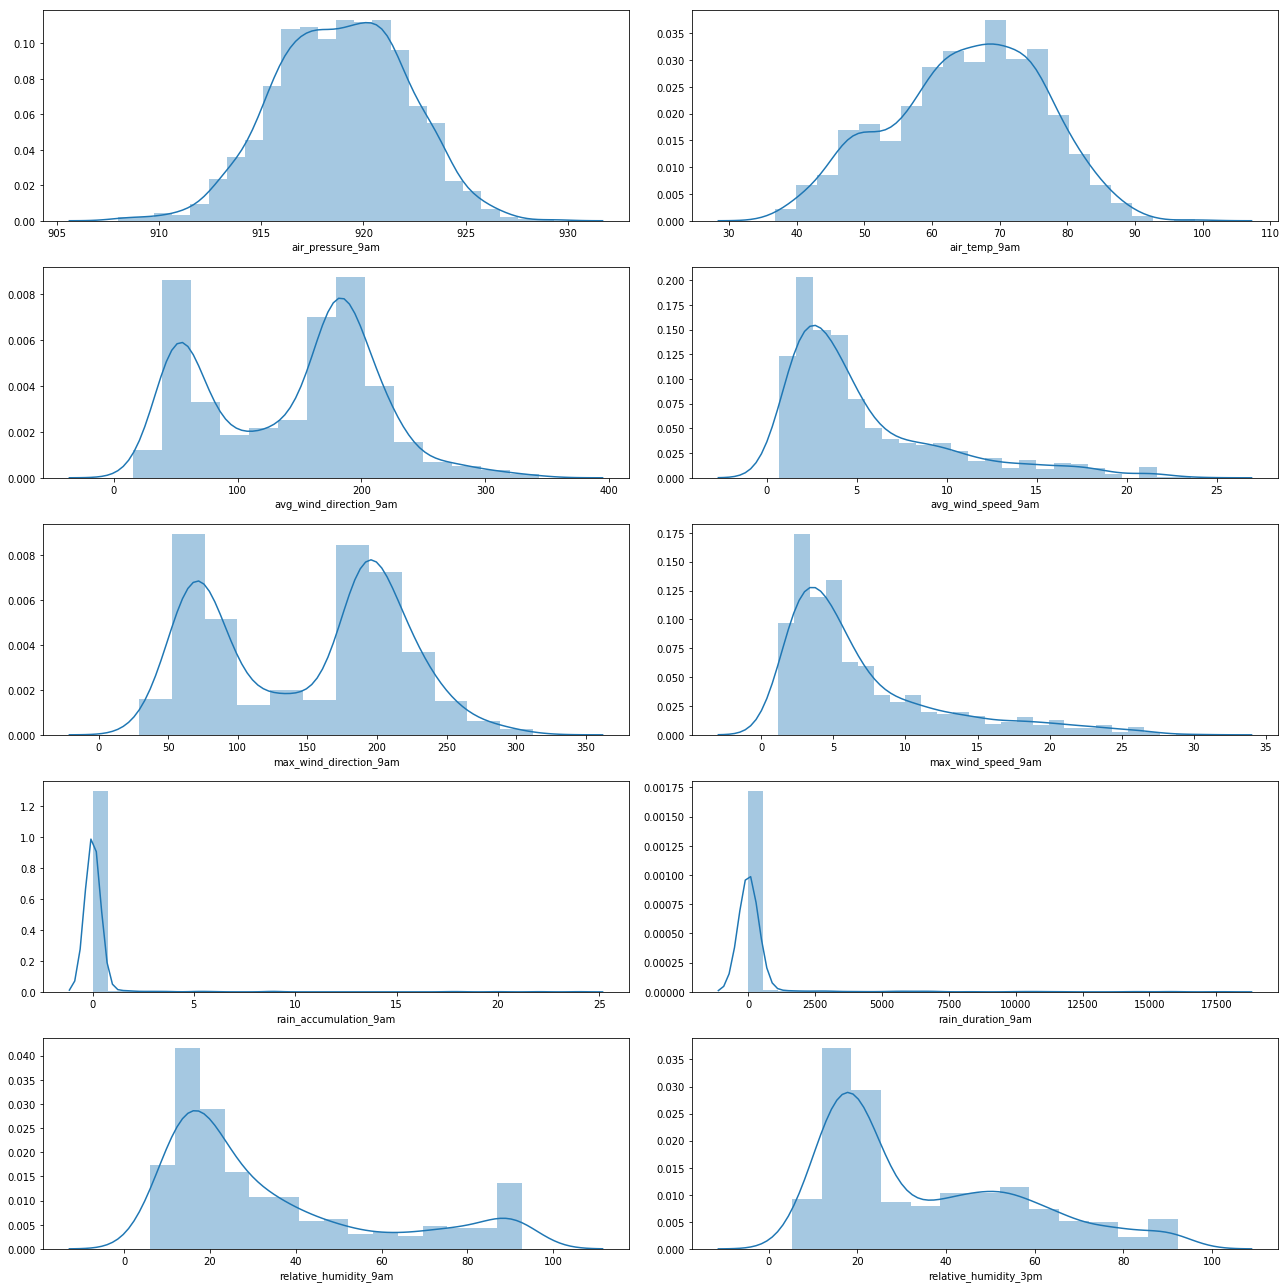

In [17]:
features = list(df.columns.values)

num_plots = len(features)
num_columns = 2
num_rows = math.ceil(num_plots/num_columns) # round up
label = 'class'

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(18,18))

if num_rows == 1:
    for index, name in enumerate(features):
        sns.distplot(df[name], ax=axs[index])
else:
    for index, name in enumerate(features):
        row = int(index / num_columns)
        col = index % num_columns
        sns.distplot(df[name], ax=axs[row][col])
plt.tight_layout()
plt.savefig(dataset_name + '_distplots_by_class.png')  
plt.show()

In [18]:
# compute pairwise correlation of the attributes
corr = df.corr()
corr

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
air_pressure_9am,1.000000,-0.057329,-0.313360,0.235826,-0.287280,0.252479,-0.085434,-0.100485,-0.431126,-0.480117
air_temp_9am,-0.057329,1.000000,-0.015069,-0.284327,-0.079520,-0.282483,-0.199102,-0.259103,-0.582318,-0.491068
avg_wind_direction_9am,-0.313360,-0.015069,1.000000,-0.441441,0.868837,-0.460122,0.117634,0.127367,0.346865,0.384885
avg_wind_speed_9am,0.235826,-0.284327,-0.441441,1.000000,-0.364338,0.995412,0.002322,0.012057,-0.095472,-0.154422
max_wind_direction_9am,-0.287280,-0.079520,0.868837,-0.364338,1.000000,-0.383025,0.091003,0.082574,0.369500,0.405946
max_wind_speed_9am,0.252479,-0.282483,-0.460122,0.995412,-0.383025,1.000000,-0.000334,0.011890,-0.108673,-0.173720
rain_accumulation_9am,-0.085434,-0.199102,0.117634,0.002322,0.091003,-0.000334,1.000000,0.735737,0.228951,0.181887
rain_duration_9am,-0.100485,-0.259103,0.127367,0.012057,0.082574,0.011890,0.735737,1.000000,0.304828,0.263283
relative_humidity_9am,-0.431126,-0.582318,0.346865,-0.095472,0.369500,-0.108673,0.228951,0.304828,1.000000,0.881301
relative_humidity_3pm,-0.480117,-0.491068,0.384885,-0.154422,0.405946,-0.173720,0.181887,0.263283,0.881301,1.000000


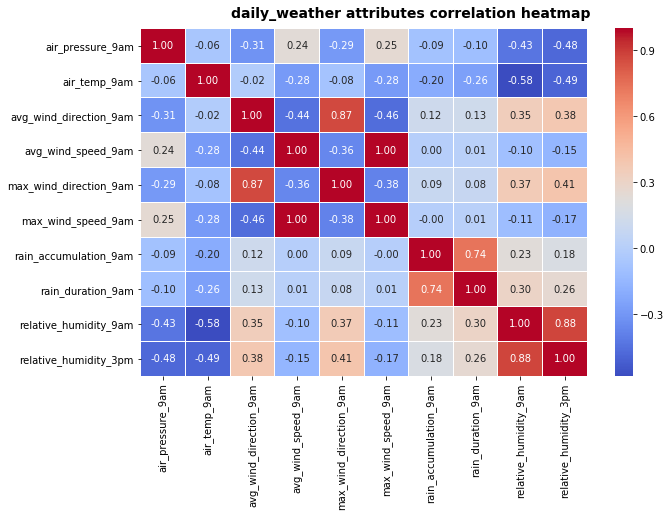

In [19]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle(dataset_name + ' attributes correlation heatmap', fontsize=14, fontweight='bold')
plt.savefig(dataset_name + '_heatmap.png')  
plt.show()

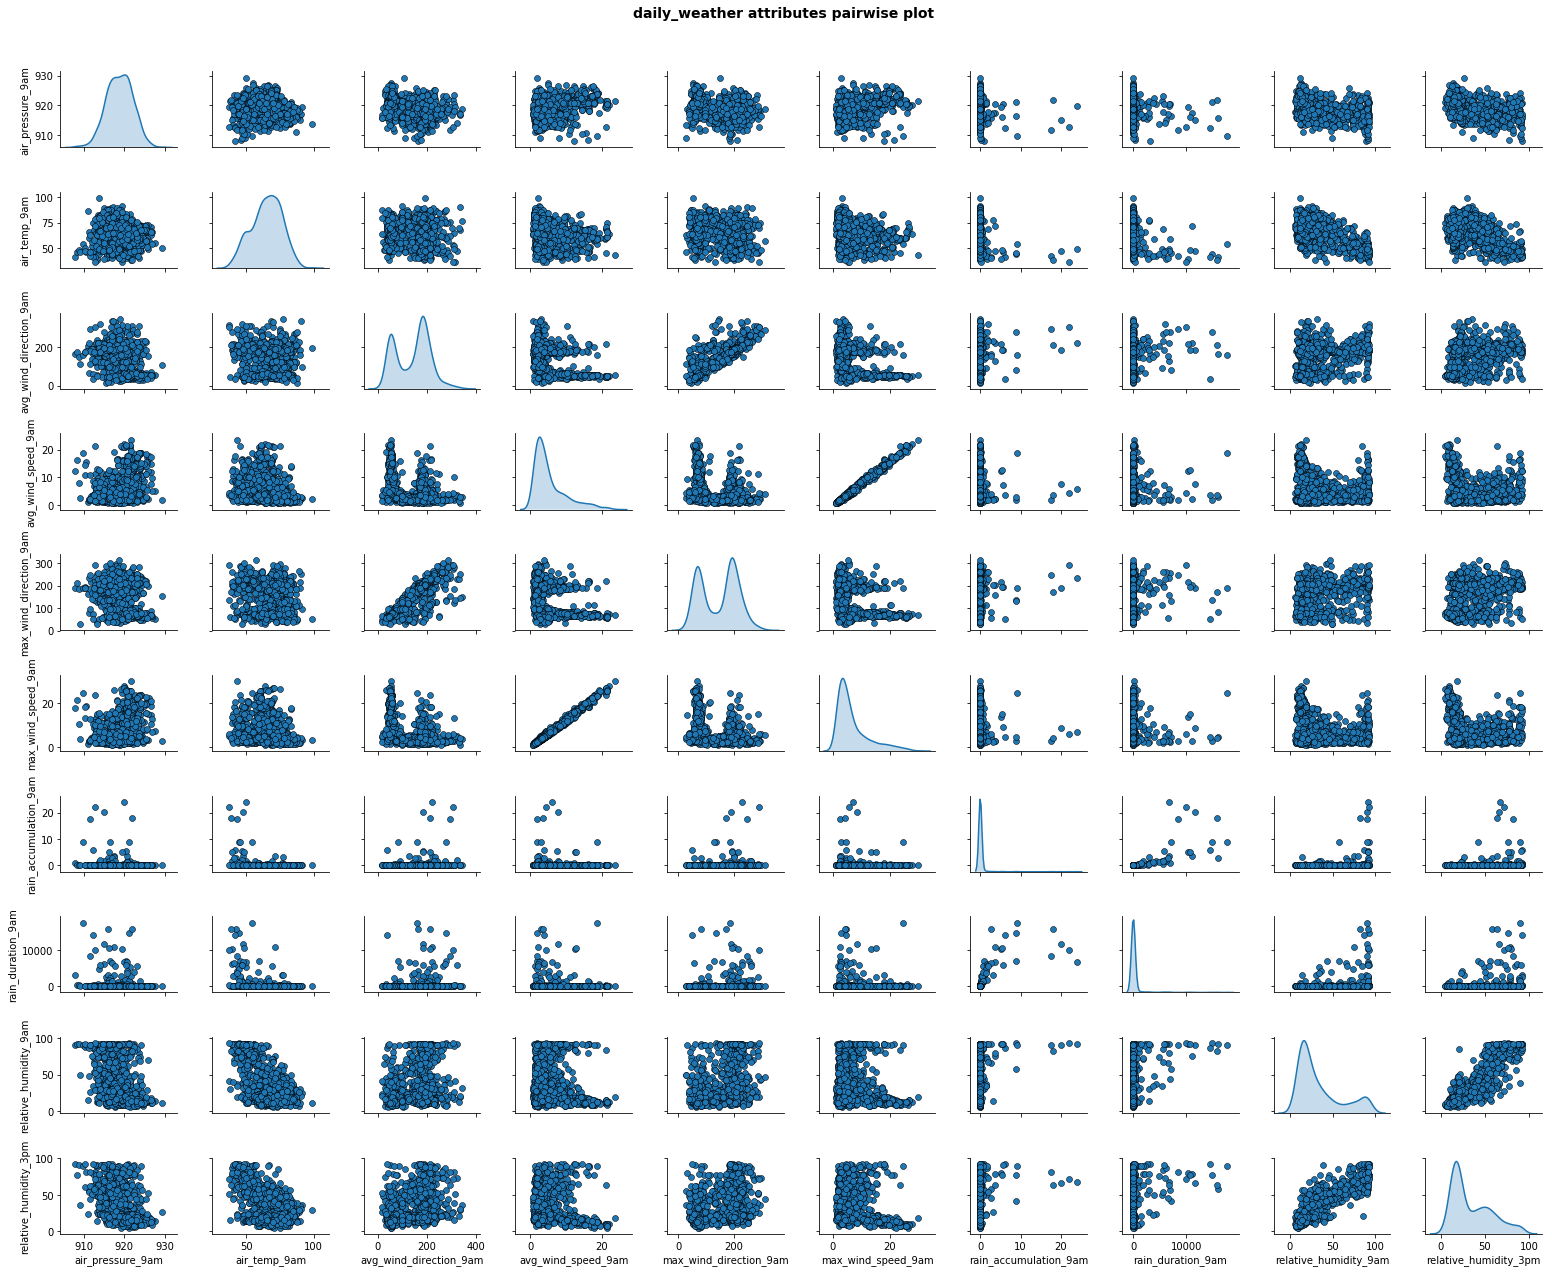

In [20]:
pp = sns.pairplot(df, height=1.8, aspect=1.2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kws=dict(shade=True), # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde") # use "kde" for diagonal plots

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle(dataset_name + ' attributes pairwise plot', fontsize=14, fontweight='bold')
plt.savefig(dataset_name + '_pairplot.png')  
plt.show()